# Exploring Prosper Loan Data

## by Ethan Forbes

## Introduction

This dataset contains 113,937 loan listings. Each listing has several features describing the loan, for example; the borrower, their credit profile, and other investment details. Some notable features include ListingKey (unique key for each listing), ListingCreationDate, CreditGrade (applicable for pre-2009 listings), Term (loan length in months), LoanStatus (current loan status), BorrowerAPR (borrower's annual percentage rate), ProsperRating, Occupation, EmploymentStatus, IncomeRange, StatedMonthlyIncome , LoanOriginalAmount, LoanOriginationDate, MonthlyLoanPayment, Investors, and more. The dataset provides information for analyzing and understanding the loan listings and associated attributes.



## Preliminary Wrangling


In [101]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [102]:
loan = pd.read_csv('prosperLoanData.csv')

loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [103]:
loan.dtypes.head(10)

ListingKey              object
ListingNumber            int64
ListingCreationDate     object
CreditGrade             object
Term                     int64
LoanStatus              object
ClosedDate              object
BorrowerAPR            float64
BorrowerRate           float64
LenderYield            float64
dtype: object

In [104]:
#The 25 most common occupations in the data set:

loan['Occupation'].value_counts().head(25)

Other                                28617
Professional                         13628
Computer Programmer                   4478
Executive                             4311
Teacher                               3759
Administrative Assistant              3688
Analyst                               3602
Sales - Commission                    3446
Accountant/CPA                        3233
Clerical                              3164
Sales - Retail                        2797
Skilled Labor                         2746
Retail Management                     2602
Nurse (RN)                            2489
Construction                          1790
Truck Driver                          1675
Laborer                               1595
Police Officer/Correction Officer     1578
Civil Service                         1457
Engineer - Mechanical                 1406
Military Enlisted                     1272
Food Service Management               1239
Engineer - Electrical                 1125
Food Servic

### Dataset Overview and Structure 

The dataset is structured in a tabular format, comprising 113,937 rows and 81 columns, with each row representing a unique loan listing and each column depicting a specific attribute associated with the loan. The dataset encompasses a diverse range of features covering loan listings, borrower details, credit profiles, loan terms, status, and investor information.

#### Key highlights of the dataset include:

##### Attribute Diversity: 
The 81 columns encompass various aspects such as credit grades, loan statuses, borrower demographics, income ranges, and listing categories.

##### Data Types: 
The dataset includes both categorical and numeric columns, with categorical data encompassing features like credit grades and employment statuses, while numeric data includes loan amounts, APRs, and monthly incomes.

##### Temporal Context: 
Columns such as ListingCreationDate and LoanOriginationDate provide temporal context, enabling time-based analysis.

##### Credit Profile Information: 
Attributes like credit score ranges, delinquencies, and utilization rates offer insights into borrower credit profiles.

##### Comprehensive Coverage: 
With a wide array of attributes, the dataset offers a comprehensive view of loan listings, borrower characteristics, credit profiles, and investment details.

Overall, the dataset is well-structured to facilitate in-depth analysis and exploration of loan data from various perspectives.

### Points of Focus

My main focus is understanding how loan rates and investor participation are influenced within the dataset. I'm curious whether borrowers with weaker traditional financial profiles might attract more investors, possibly because of perceived risk diversification. I aim to test this hypothesis.

### Key Data Features

To support my investigation, I've identified key variables such as credit score, income, employment status, occupation, location, loan amount, monthly payment, delinquency metrics, borrower APR, borrower rate, and investor count. These factors will provide the necessary data to analyze and validate my hypothesis.

## Univariate Exploration



Text(0.5,0,'Loan Amount')

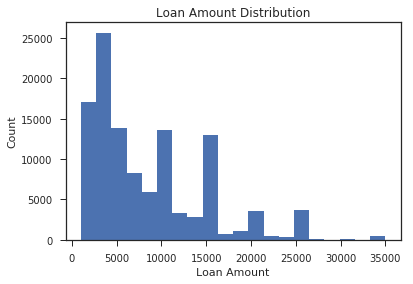

In [105]:
#histogram of original loan amount. this will give me an idea of the scale I'm dealing with in the data.


plt.hist(loan['LoanOriginalAmount'], bins = 20)
plt.title('Loan Amount Distribution')
plt.ylabel('Count')
plt.xlabel('Loan Amount')

### Original Loan Amount Histogram Discussion

The histogram above show me that a significant portion of the loans are for \\$5,000 or less. There are spikes at \\$10,000 and \\$15,000 indicating that these are also very common loan types

In [106]:
# Calculate the mean of CreditScoreRangeUpper grouped by Occupation
mean_credit_score = loan.groupby('Occupation')[['Investors', 'CreditScoreRangeUpper', 'LoanOriginalAmount']].mean()

# Sort the values in descending order
sorted_mean_credit_score = mean_credit_score.sort_values('Investors',ascending=False)

sorted_mean_credit_score.head(10)

,Investors,CreditScoreRangeUpper,LoanOriginalAmount
Occupation,,,
Doctor,128.791498,736.611336,13115.649798
Pilot - Private/Commercial,122.110553,728.145729,11416.140704
Architect,115.352113,714.023474,9758.887324
Realtor,114.966851,703.788214,8390.511971
Engineer - Chemical,112.857778,724.066667,10831.080000
Judge,111.954545,744.454545,14654.545455
Pharmacist,108.813230,739.155642,13853.766537
Executive,108.272327,721.881002,11890.576664
Principal,107.035256,726.051282,11976.522436


Text(0.5,0,'Investors')

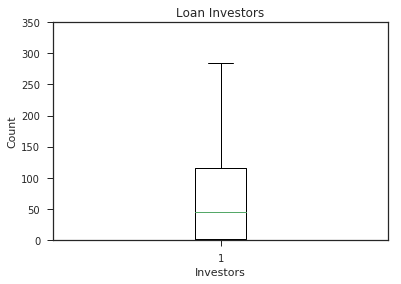

In [107]:
#Box plot of the number of investors on each loan. I set the y-limit to reduce the number of outliers visible.

plt.boxplot(loan['Investors'])
plt.ylim(0,350)
plt.title('Loan Investors')
plt.ylabel('Count')
plt.xlabel('Investors')

### Investors Boxplot

The average number of investors per loan is around 50, with the interquartile range between 1 and 120 investors. This indicates that while most loans have a relatively low number of investors, there are many outliers. I'm curious to explore what factors contribute to a higher number of investors.

I don't think I need to make any transformations at this point. While some analyses might exclude outliers, I believe they could provide valuable insights for my investigation.

(0, 1000)

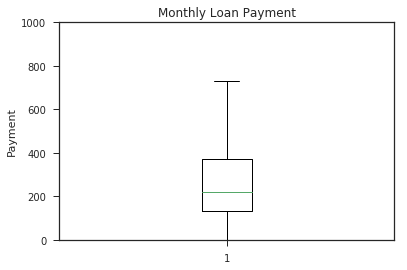

In [108]:
valid_data = loan.dropna(subset=['MonthlyLoanPayment'])

# Create a boxplot for 'AmountDelinquent'
plt.boxplot(valid_data['MonthlyLoanPayment'])

# Set the title, labels, and axis limits for the plot
plt.title('Monthly Loan Payment')
plt.ylabel('Payment')
plt.xlabel('')
plt.ylim(0,1000)



### Unusual Distributions and Additional Data Transformation

The loan amount distribution shows distinct peaks at specific amounts like \\$4,000, \\$10,000, \\$15,000, and \\$20,000. I don't plan to make further data adjustments as the dataset appears clean and organized.

In [109]:
# Create bins and labels
bins = [0, 4999, 9999, 14999, 19999, 24999, 29999]
labels = ['<$5,000', '$5,000-$9,999', '$10,000-$14,999', '$15,000-$19,999', '$20,000-$24,999', '$25,000-$29,999']

# Create the "LoanBucket" column using pd.cut()
loan['LoanBucket'] = pd.cut(loan['LoanOriginalAmount'], bins=bins, labels=labels, right=False)


## Bivariate Exploration


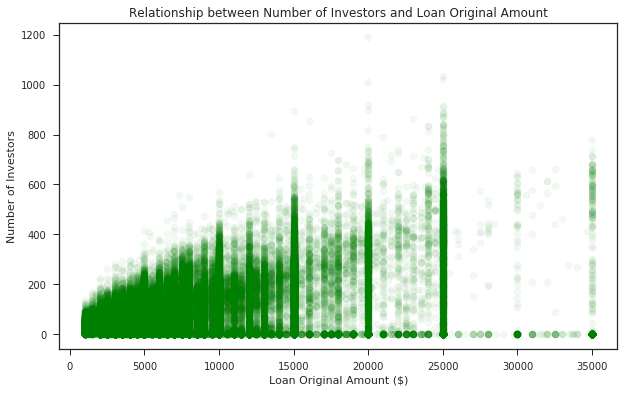

In [110]:
def create_scatter_plot(data, x_column, y_column, x_label='', y_label='', title=''):
    # Set the figure size
    plt.figure(figsize=(10, 6))
    
    # Create the scatter plot
    plt.scatter(data=data, y=y_column, x=x_column, alpha=0.05, color='green')
    
    # Customize the plot
    if y_label:
        plt.ylabel(y_label)  # Label for y-axis
    if x_label:
        plt.xlabel(x_label)  # Label for x-axis
    if title:
        plt.title(title)  # Title for the plot
    
    # Add gridlines
    plt.grid(True, which='both', linestyle='--', alpha=0.05)
    
    # Display the plot
    plt.show()

# Create the scatter plot using the new function
create_scatter_plot(loan, 'LoanOriginalAmount', 'Investors', x_label='Loan Original Amount ($)', y_label='Number of Investors', title='Relationship between Number of Investors and Loan Original Amount')    



### Investors - Loan Amount Scatter Plot

The graph above shows the relationship between the loan amount and number of investors on a loan. There is a positive correlation between the loan size and number of investors, however I find it very interesting that the range in the number of investors increases with the loan amount. For example a loan for \\$4,500 is likley to have between 1 and 150 investors, while a loan for \\$20,000 is likely to have between 1 and 700 investors.

(0, 350)

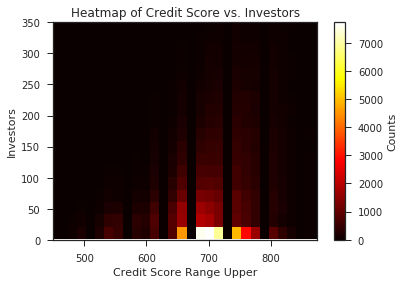

In [111]:
loan_filled = loan.copy()
loan_filled['CreditScoreRangeUpper'].fillna(loan_filled['CreditScoreRangeUpper'].mean(), inplace=True)
loan_filled['Investors'].fillna(loan_filled['Investors'].mean(), inplace=True)

# Create a heatmap using plt.imshow with increased bins
heatmap, xedges, yedges = np.histogram2d(x=loan_filled['CreditScoreRangeUpper'], y=loan_filled['Investors'], bins=60)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='hot')

# Add a colorbar manually
cbar = plt.colorbar()
cbar.set_label('Counts')

plt.xlabel('Credit Score Range Upper')
plt.ylabel('Investors')
plt.title('Heatmap of Credit Score vs. Investors')
plt.xlim(450,875)
plt.ylim(0,350)

### Credit Score - Investors Heat map

The heat map above depicts the relationhip between the 'CreditScoreRangeUpper' column and the 'Investors' column. There is a heavy grouping in the 680-720 credit 1-20 investors. There are a few bands of credt scores with little to no observations, I might want to explore that a bit further later on.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

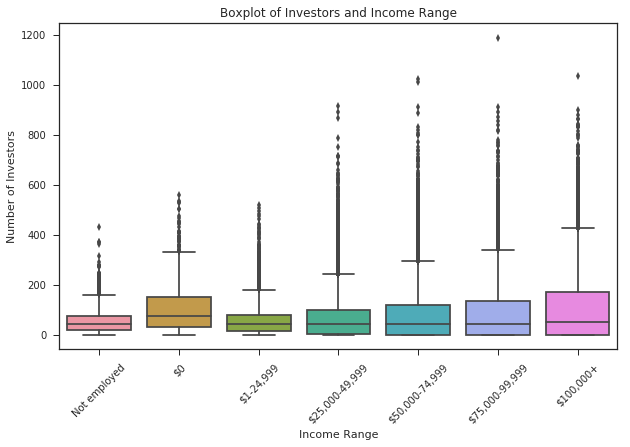

In [112]:
# Convert 'IncomeRange' column to ordered categorical variable
income_range_order = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999',
                      '$100,000+']

loan_cleaned = loan.dropna(subset=['LoanBucket', 'Investors'])
loan_cleaned['IncomeRange'] = pd.Categorical(loan_cleaned['IncomeRange'], categories=income_range_order,
                                             ordered=True)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bivariate boxplot with ordered income range
sb.boxplot(data=loan_cleaned, x='IncomeRange', y='Investors')

# Set the axis labels and title
plt.xlabel('Income Range')
plt.ylabel('Number of Investors')
plt.title('Boxplot of Investors and Income Range')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

### Income - Investors Bivariate Boxplot

The chart above shows the relationship between income and the number of investors. Interestingly enough the trend is more leaning toward borrowers ith higher incomes having more investors, perhaps this has to do with the size of the loan being issued. There is one exception to that trend and that is for borrowers with 0 for income, they have closer numbers to borrowers in the \\$75k-\\$99k range than the group directly adjacent to them. However, it looks like the number of observaitons in the \\$0 group is significantly lower than most of the other income ranges.

In [113]:
loan_cleaned['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$75,000-99,999    16916
$100,000+         16724
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

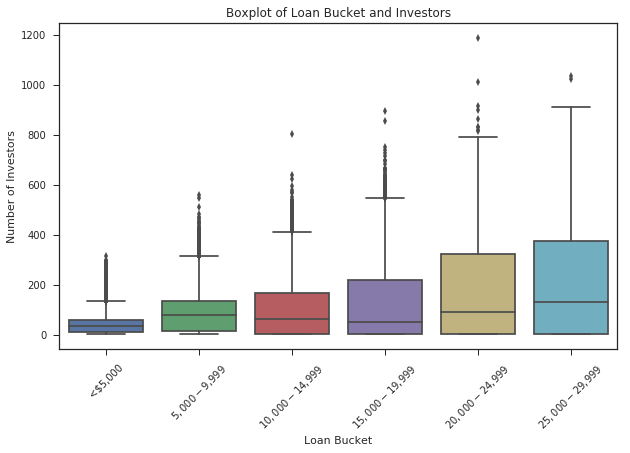

In [114]:
# Filter out missing values in 'LoanBucket' and 'Investors'
loan_cleaned = loan.dropna(subset=['LoanBucket', 'Investors'])

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bivariate boxplot
sb.boxplot(data=loan_cleaned, x='LoanBucket', y='Investors')

# Set the axis labels and title
plt.xlabel('Loan Bucket')
plt.ylabel('Number of Investors')
plt.title('Boxplot of Loan Bucket and Investors')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

### Loan Amount and Investors Boxplot

The boxplot above shows a clear positive relationship between the loan amount and the number of investors on a loan. This make a lot more sense now that I see this plot. I have a feeling that loan amount will be the single biggest factor in explaining how many investors a loan has. 

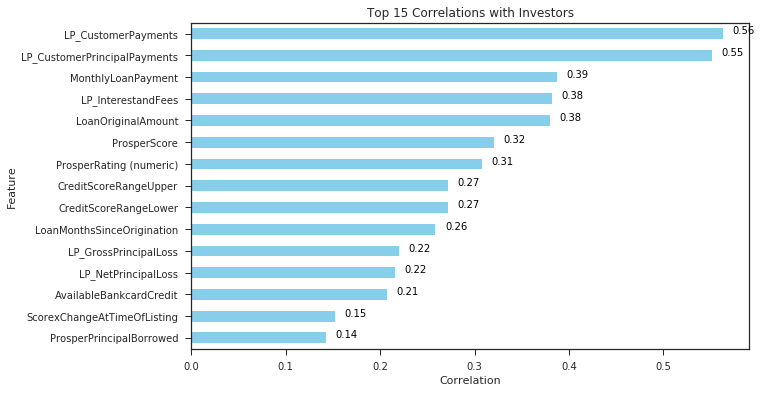

In [115]:
correlation = loan.corr()['Investors']

# Sort correlation values in descending order and select the top 15
sortedcorr = correlation.sort_values(ascending=False)[1:16]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the horizontal bar plot
ax = sortedcorr.plot(kind='barh', color='skyblue')

# Customize the plot
ax.invert_yaxis()  # Invert y-axis to show highest correlation at the top
plt.xlabel('Correlation')  # Label for x-axis
plt.ylabel('Feature')  # Label for y-axis
plt.title('Top 15 Correlations with Investors')  # Title for the plot

# Adjust the axis limits if needed
# plt.xlim(-1, 1)  # Example: Set the limits to -1 and 1

# Add data value labels to the bars
for i, v in enumerate(sortedcorr):
    ax.text(v + 0.01, i, f'{v:.2f}', color='black', ha='left')

### Investor Correlation Barchart

The chart above shows the 15 columns with the highest positive correlation to the investors column, the top 4 are primarily related to the loan size. This further cements the liklihood that the most likely indicator of how many investors are on a loan is the loan amount.

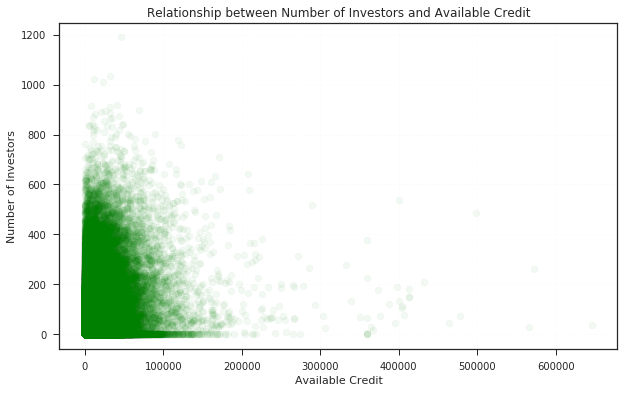

In [116]:
# Create plot using function defined earlier
create_scatter_plot(loan, 'AvailableBankcardCredit', 'Investors', x_label='Available Credit', y_label='Number of Investors', title='Relationship between Number of Investors and Available Credit')

### Investors - Available Credit Scatter Plot

It appears that a slightly negative relationship exists between the number of investors and available credit, although the observations are clustered to tightly in the bottom-left corner that it is hard to say for sure without more sophisticated analysis.

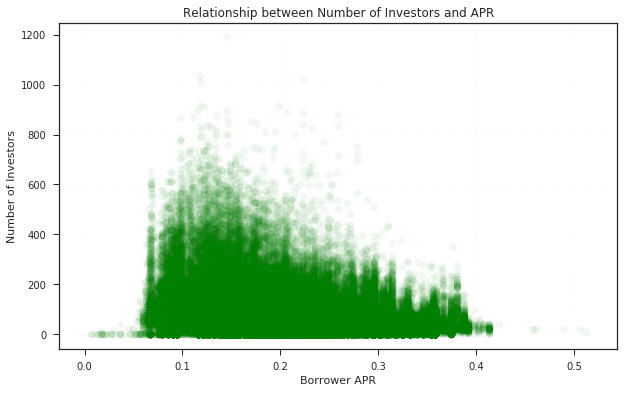

In [117]:
# Create plot using function defined earlier
create_scatter_plot(loan, 'BorrowerAPR', 'Investors', x_label='Borrower APR', y_label='Number of Investors', title='Relationship between Number of Investors and APR')

### Investors - Borrower APR Scatter Plot

This scatter plot shows an interesting relationship between the number of investors on a loan and the APR. The number of investors increases with the APR for a bit then begins to fall off around 20%. This is likely due to larger loans having lower APR on average. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

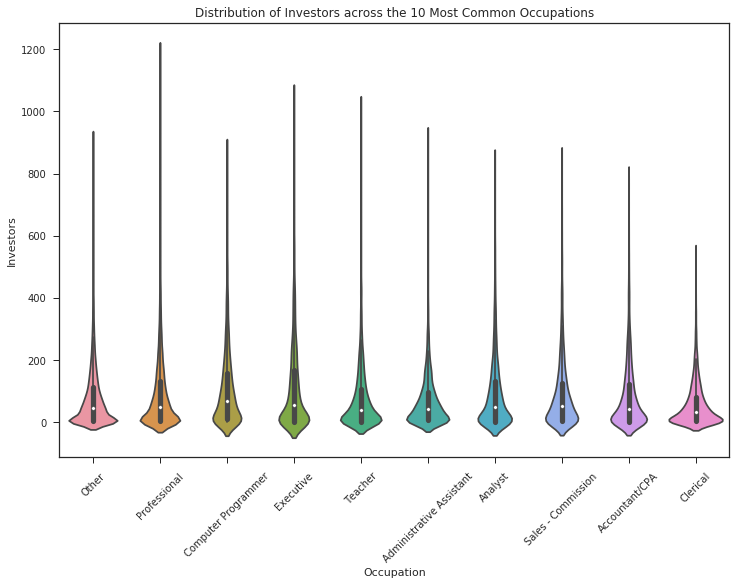

In [118]:
# Get the top 10 most common occupations
top_10_occupations = loan['Occupation'].value_counts().head(10).index

# Filter the dataset to include only the top 10 occupations
filtered_loan = loan[loan['Occupation'].isin(top_10_occupations)]

# Create a violin plot
plt.figure(figsize=(12, 8))  # Set the figure size

# Plot the violin plot
sb.violinplot(data=filtered_loan, x='Occupation', y='Investors', order=top_10_occupations)
plt.title('Distribution of Investors across the 10 Most Common Occupations')
plt.xlabel('Occupation')
plt.ylabel('Investors')
plt.xticks(rotation=45)

### Distribution of Investors across most common occupations

The violin plot above shows the distribution of the investors column across the 10 most common occupations in the data set. It is interesting to see how the distribution varies by occupation, some like 'Clerical', 'Administrative Assistant', and 'Professional' have much wider bases than other occupations like 'Executive', 'Analyst', and 'Sales'. This may be tied to the income range for these positions and the average loan amount.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

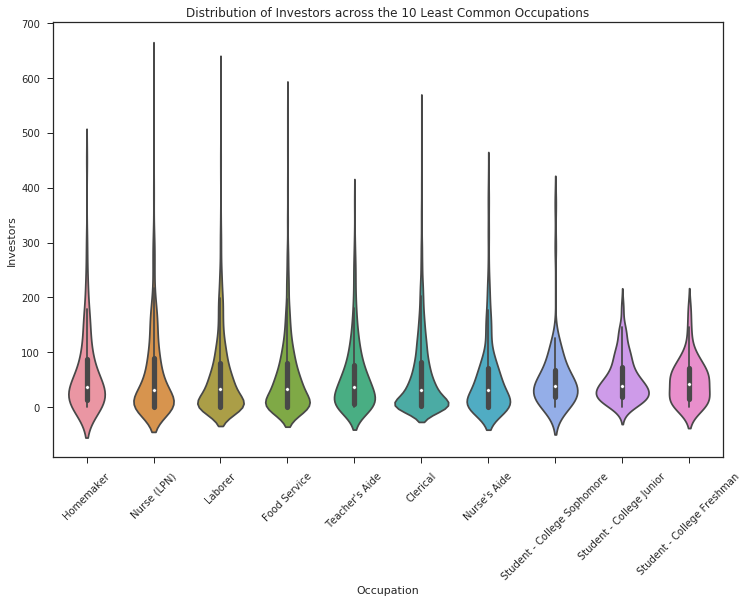

In [119]:
# Calculate the mean of CreditScoreRangeUpper grouped by Occupation
mean_credit_score = loan.groupby('Occupation')[['Investors', 'CreditScoreRangeUpper', 'LoanOriginalAmount']].mean()

# Sort the values in descending order
sorted_mean_credit_score = mean_credit_score.sort_values('Investors', ascending=False)

# Get the 10 occupations with the worst credit score on average
top_10_occupations = sorted_mean_credit_score.tail(10).index

# Filter the dataset to include only the top 10 occupations
filtered_loan = loan[loan['Occupation'].isin(top_10_occupations)]

# Create a violin plot
plt.figure(figsize=(12, 8))  # Set the figure size

# Plot the violin plot
sb.violinplot(data=filtered_loan, x='Occupation', y='Investors', order=top_10_occupations)
plt.title('Distribution of Investors across the 10 Least Common Occupations')
plt.xlabel('Occupation')
plt.ylabel('Investors')
plt.xticks(rotation=45)

### Occupations with worst credit score on average

The chart above shows distribution of the Investors column for the occupations with the lowest average credit score. In general the distributions are relatively uniform with only a couple of exceptions ('Clerical', all three 'Student' categories, and 'homemaker')

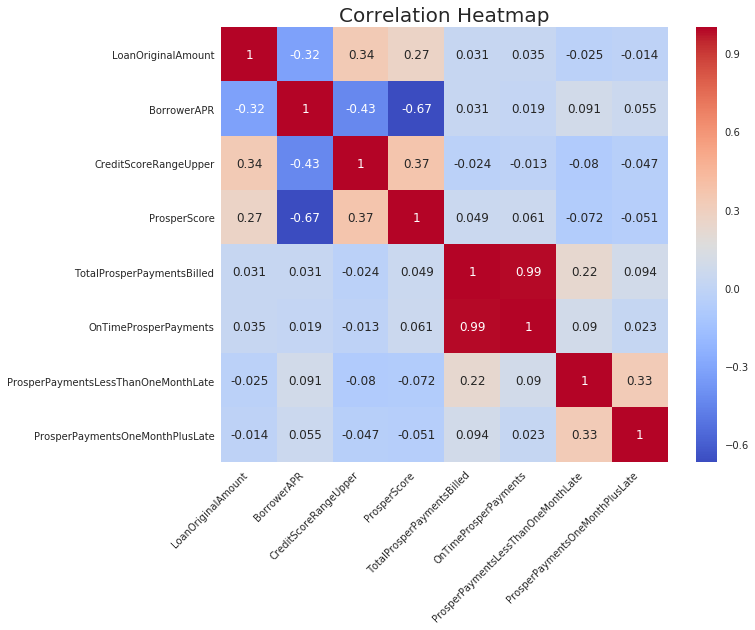

In [126]:
# Select the columns for the heatmap
columns = ['LoanOriginalAmount', 'BorrowerAPR', 'CreditScoreRangeUpper', 'EmploymentStatus', 'ProsperScore','TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate']

# Create a subset of the DataFrame with the selected columns
subset = loan[columns]

# Calculate the correlation matrix
corr_matrix = subset.corr()

# Set the style of the plot
sb.set(style="white")

# Create a heatmap
plt.figure(figsize=(10, 8))
heatmap = sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Rotate x-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')

# Set the title of the plot
plt.title('Correlation Heatmap', size=20)

# Show the plot
plt.show()

### Correlation Heatmap

The heatmap above shows the correlation coefficients for a select group of columns. I chose a smaller subset to reduce the amount of information as I thought it owuld be cumbersome to show the relaitons ships between all 81 columns. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

My original theory of the factors that influenced the number of investors was that a borrowers credit profile. However through my exploratory analysis I realized that the standard factors of credit worthiness were actually not as impactful to the number of investors as I expected. 

One of the main factors was actually the loan size, which is intuitive when considering the type of loans captured in the dataset. Being that it is a crowd-funded loan site, the average investor is not investing more than a couple hundred of dollars per loan.

### Other Points of interest

Borrowers with higher credit scores generally take on higher loans, I found this to also be a fairly intuitive conclusion, still interesting however.

## Multivariate Exploration


Text(0.5,0.98,'Relationships between Investors, Credit Score, and Loan Amount by 20 Occupations with Most Investors')

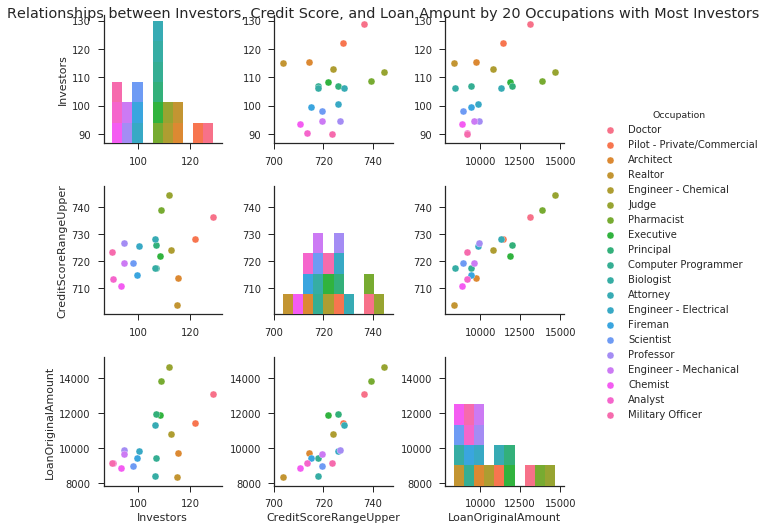

In [121]:
# Calculate the mean of CreditScoreRangeUpper grouped by Occupation
mean_credit_score = loan.groupby('Occupation')[['Investors', 'CreditScoreRangeUpper', 'LoanOriginalAmount']].mean()

# Sort the values in descending order
sorted_mean_credit_score = mean_credit_score.sort_values('Investors', ascending=False)

# Reset the index
sorted_mean_credit_score.reset_index(inplace=True)

# Set the style of the plot
sb.set(style="ticks")

# Create a pairplot with 'Occupation' as the hue
plot = sb.pairplot(sorted_mean_credit_score.head(20), hue='Occupation')

# Set the title of the plot
plot.fig.suptitle('Relationships between Investors, Credit Score, and Loan Amount by 20 Occupations with Most Investors')


### Occupation Pairplot

The pairplot above shows the relationships between the 'Investors', CreditScoreRangeUpper', and 'LoanOriginalAmount' columns for the 20 occupations with the most investors on average. it is interesting to see which features are closely correlated and which are less so.

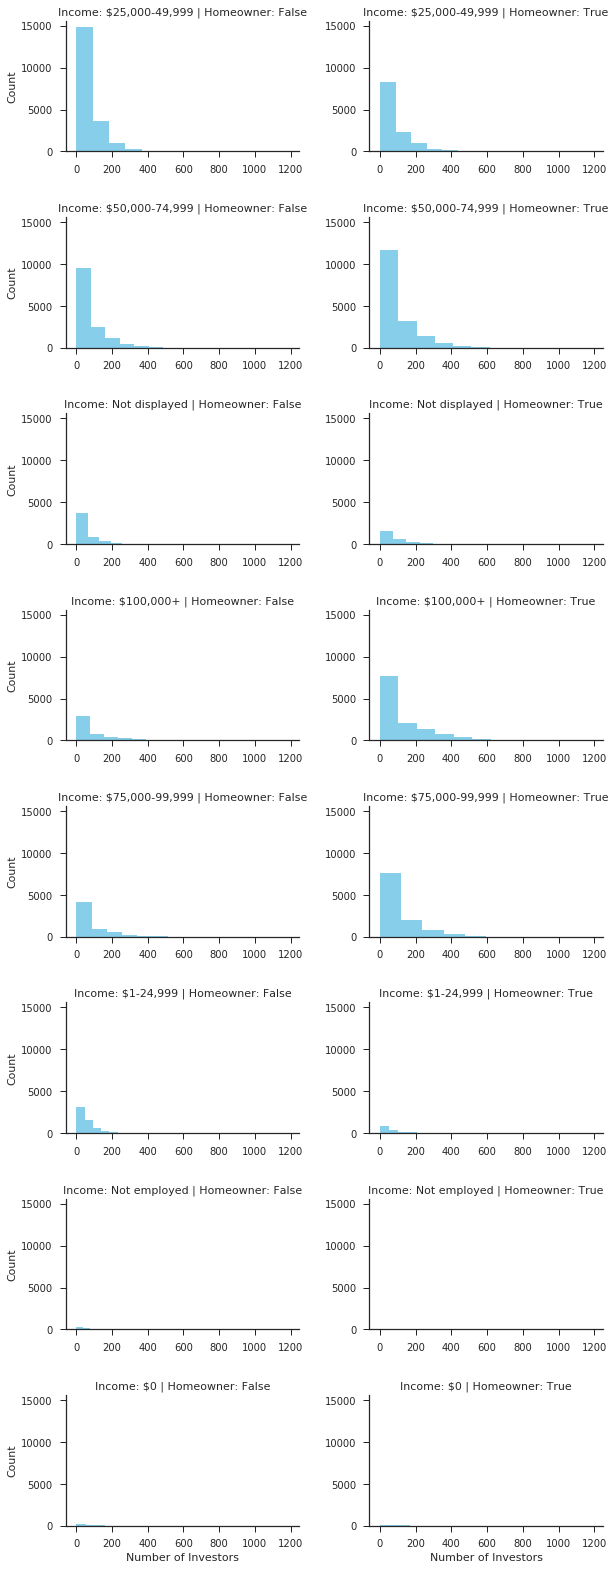

In [122]:
# Create a FacetGrid
grid = sb.FacetGrid(data=loan, row='IncomeRange', col='IsBorrowerHomeowner', aspect=1.5)

# Plot the histogram of the number of investors
grid.map(plt.hist, 'Investors', bins=10, color='skyblue')

# Set the titles and axis labels
grid.set_titles(row_template='Income: {row_name}', col_template='Homeowner: {col_name}')
grid.set_xlabels('Number of Investors')
grid.set_ylabels('Count')
# Adjust the spacing between subplots
plt.subplots_adjust(top=0.9, hspace=0.5, wspace=0.3)

### FacetGrid

The facet grid above shows that the distribution of investros is not affected by homeownership or income. This is contrary to my original hypothosis. Investors appears to be unimodal with a strong right skew. Most borrowers have a less than 200 investors on their loan.  

## Investor Insights: Impact of Loan Size and Borrower Risk

In this phase of the analysis, notable relationships emerged upon closer examination. Particularly, the interplay among various factors underscored the influence on the investor column, notably linked to loan size, monthly payment, and ProsperScore. Interestingly, it appears that loans extended to lower-risk borrowers tend to attract more investors, likely due to the propensity for larger loan amounts being granted to these borrowers.

Moreover, exploring multivariate visuals provided further reinforcement of observations made during the bivariate analysis. Notably, examining the pair plot for the averages of the 15 most common occupations revealed intriguing interactions among variables. While certain combinations, such as credit score and investors, displayed negligible correlation, others, like credit score and loan amount, exhibited a distinctly strong positive correlation.


## Conclusions

In conclusion, the data analysis process was largely straightforward, requiring minimal manipulation to facilitate the desired analyses. Precautionary measures, such as addressing NA values and organizing data for visual clarity, were undertaken, including binning observations for a boxplot and ordering income ranges for visualization purposes.

Contrary to the initial hypothesis regarding the correlation between loans issued to higher-risk borrowers and investor activity, the primary determinant emerged as loan size. This underscores the significance of nuanced factors in shaping investor behavior within the lending landscape.

